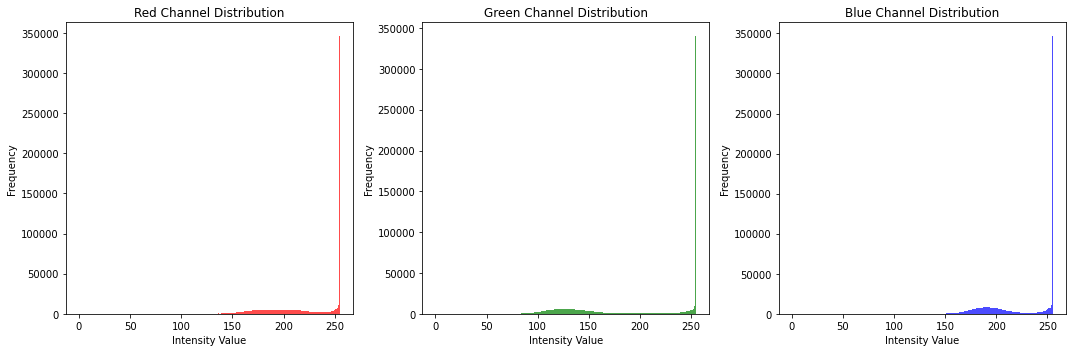

{'Channel': ['Red', 'Green', 'Blue'], 'Mean': [193.65686051226788, 139.7754786888342, 194.34871099803914], 'Median': [194.0, 132.0, 193.0], 'Std Dev': [27.185095443387542, 35.31851363212004, 22.844471773628896], 'Skewness': [-0.6953809746576717, 1.0895286909184776, -0.8553143573995382], 'Kurtosis': [3.5065823275630583, 1.4514036824854735, 8.483550794924236]}


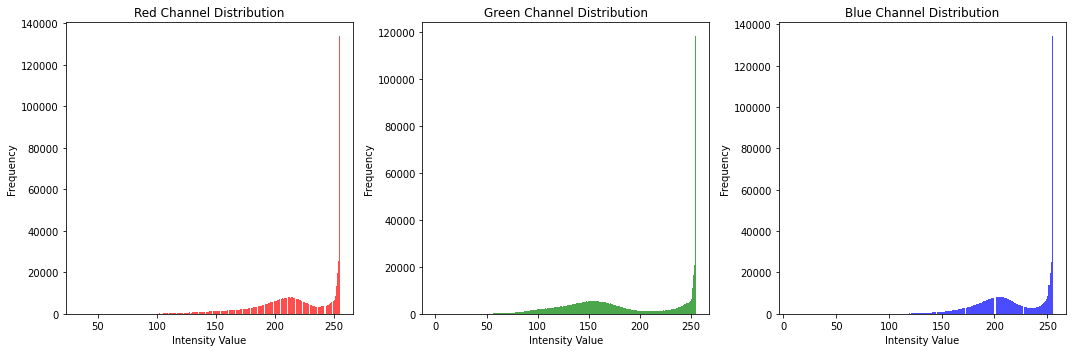

{'Channel': ['Red', 'Green', 'Blue'], 'Mean': [202.46606595982266, 155.62592179018012, 201.71712235624494], 'Median': [208.0, 154.0, 203.0], 'Std Dev': [30.06207298978482, 39.58312231241197, 26.58979203492284], 'Skewness': [-0.8544345311522333, 0.19264185935535355, -0.5301090852178713], 'Kurtosis': [0.7142710962262941, -0.22145084905982282, 0.9694708017726423]}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import openslide

def load_wsi_thumbnail(wsi_path, thumbnail_size=(1024, 1024)):
    """
    Load a WSI thumbnail using OpenSlide and extract RGB data.
    """
    try:
        slide = openslide.OpenSlide(wsi_path)
        thumbnail = slide.get_thumbnail(thumbnail_size)
        thumbnail_rgb = np.array(thumbnail)[:, :, :3]  # Extract RGB channels
        return thumbnail_rgb
    except Exception as e:
        print(f"Error loading WSI thumbnail: {e}")
        return None

def create_background_mask(rgb_data, threshold=240):
    """
    Create a mask for the white background.
    
    Args:
    rgb_data (np.ndarray): Array containing the RGB data of an image.
    threshold (int): Threshold value to determine background pixels.

    Returns:
    np.ndarray: A boolean mask where True indicates background.
    """
    # A pixel is considered background if all its channels have values above the threshold
    return np.all(rgb_data > threshold, axis=-1)

def analyze_rgb_distribution(rgb_data, mask=None):
    """
    Calculate and display statistics and plots for RGB channels of an image.
    """
    # Apply the mask to each RGB channel if provided
    if mask is not None:
        r, g, b = rgb_data[:, :, 0], rgb_data[:, :, 1], rgb_data[:, :, 2]
        r = r[~mask]
        g = g[~mask]
        b = b[~mask]
    else:
        r, g, b = rgb_data[:, :, 0], rgb_data[:, :, 1], rgb_data[:, :, 2]

    # Flatten the channels for analysis
    r_flat, g_flat, b_flat = r.flatten(), g.flatten(), b.flatten()


    # Calculate statistics
    stats = {
        'Channel': ['Red', 'Green', 'Blue'],
        'Mean': [np.mean(r_flat), np.mean(g_flat), np.mean(b_flat)],
        'Median': [np.median(r_flat), np.median(g_flat), np.median(b_flat)],
        'Std Dev': [np.std(r_flat), np.std(g_flat), np.std(b_flat)],
        'Skewness': [skew(r_flat), skew(g_flat), skew(b_flat)],
        'Kurtosis': [kurtosis(r_flat), kurtosis(g_flat), kurtosis(b_flat)]
    }

    # Plotting histograms
    plt.figure(figsize=(15, 5))
    for i, color in enumerate(['Red', 'Green', 'Blue']):
        plt.subplot(1, 3, i + 1)
        plt.hist(rgb_data[:, :, i].flatten(), bins=256, color=color.lower(), alpha=0.7)
        plt.title(f'{color} Channel Distribution')
        plt.xlabel('Intensity Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    return stats

# Example usage
wsi_paths = ['/tank/WSI_data/CRC_multiplexed/HandE_slides_processed/CRC13-HE_RGB.tif', '/tank/WSI_data/CRC_multiplexed/HandE_slides_processed/CRC15-HE_RGB.tif']
for path in wsi_paths:
    thumbnail = load_wsi_thumbnail(path)
    if thumbnail is not None:
        background_mask = create_background_mask(thumbnail)
        stats = analyze_rgb_distribution(thumbnail, mask=background_mask)
        print(stats)


['/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-57-1994-01Z-00-DX1.A0798185-30C5-4C32-B1A8-B440D4F4ED95.svs', '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-23-1027-01Z-00-DX1.53F9DFF4-6811-4184-B2FD-1F6706B948FD.svs', '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-42-2593-01Z-00-DX1.9d506f1d-a5b3-4643-bd12-91c33fae4286.svs', '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-OY-A56Q-01Z-00-DX1.F1556F26-8845-4962-9004-70F9747B46B7.svs', '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-25-1323-01Z-00-DX1.1B82D1C9-2310-4AAB-B531-45C1191E5FF8.svs', '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-25-2409-01Z-00-DX1.34FFD6A9-4919-4DF5-8415-215CC833F12D.svs', '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-25-1314-01Z-00-DX1.E01C2237-E2D6-4D84-9FB4-624734F30375.svs', '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-WR-A838-01Z-00-DX1.5FE22DE4-CEFB-45F6-9299-505023A8F3BA.svs', '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/TCGA-25-2392-01Z-00-DX1.C37932E5-973F-444D-8CEB-1BED4279165E.svs', 

Set A Statistics: {'Channel': ['Red', 'Green', 'Blue'], 'Mean': [201.13993288541695, 163.07413219795978, 186.81278982856807], 'Median': [209.0, 151.0, 180.0], 'Std Dev': [38.28647342994751, 60.37336411035656, 42.48285761505887], 'Skewness': [-0.913289640156185, 0.013636645437789733, -0.17092812084690065], 'Kurtosis': [0.5714382632074666, -1.350229039409607, -0.7967820628060811]}
Set B Statistics: {'Channel': ['Red', 'Green', 'Blue'], 'Mean': [194.03120294473496, 158.63824094845958, 193.41065796375483], 'Median': [211.0, 159.0, 203.0], 'Std Dev': [46.51445042622705, 59.594336768198794, 35.640449445809814], 'Skewness': [-1.8738820559121057, -0.32969913048980537, -1.1501576850938813], 'Kurtosis': [4.23646790975633, -1.1490544964657647, 2.3055417360978785]}


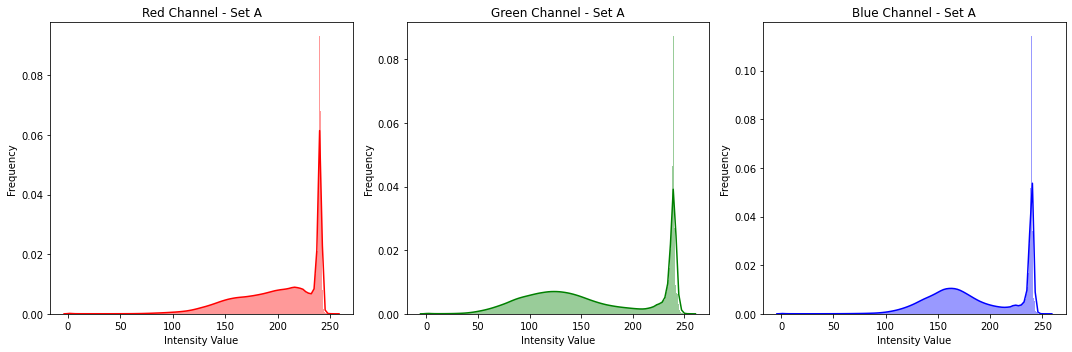

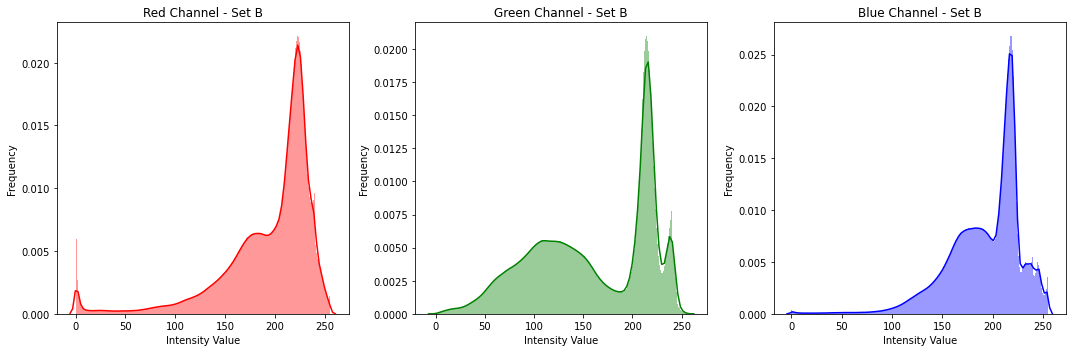

In [2]:
import openslide
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import os 
import pandas as pd


def get_image_paths(directory):
    """
    Get paths of all .ome.tiff files in the given directory.
    """
    return [os.path.join(directory, f) for f in os.listdir(directory) if (f.endswith('.tif') or f.endswith('.mrxs') or f.endswith('.svs'))]

def get_image_paths_from_csv(directory, csv_file):
    """
    Get paths of specific .ome.tiff files listed in a CSV file within the given directory.
    """
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Assuming the column containing image names is named 'image_name'
    image_names = df['slide_id'].tolist()
    image_names = [image_name + ".svs" for image_name in image_names]

    # Construct full paths
    return [os.path.join(directory, f) for f in image_names]



def load_wsi_thumbnail(wsi_path, thumbnail_size=(1024, 1024)):
    """
    Load a WSI thumbnail using OpenSlide and extract RGB data.
    """
    try:
        slide = openslide.OpenSlide(wsi_path)
        thumbnail = slide.get_thumbnail(thumbnail_size)
        thumbnail_rgb = np.array(thumbnail)[:, :, :3]  # Extract RGB channels
        return thumbnail_rgb
    except Exception as e:
        print(f"Error loading WSI thumbnail: {e}")
        return None

def create_background_mask(rgb_data, threshold=240):
    """
    Create a mask for the white background.
    """
    # A pixel is considered background if all its channels have values above the threshold
    return np.all(rgb_data > threshold, axis=-1)

def analyze_rgb_distribution(rgb_data):
    """
    Calculate and display statistics for RGB channels of an image.
    """
    # Separate RGB channels
    r, g, b = rgb_data[:, 0], rgb_data[:, 1], rgb_data[:, 2]

    # Calculate statistics
    stats = {
        'Channel': ['Red', 'Green', 'Blue'],
        'Mean': [np.mean(r), np.mean(g), np.mean(b)],
        'Median': [np.median(r), np.median(g), np.median(b)],
        'Std Dev': [np.std(r), np.std(g), np.std(b)],
        'Skewness': [skew(r), skew(g), skew(b)],
        'Kurtosis': [kurtosis(r), kurtosis(g), kurtosis(b)]
    }

    return stats

def process_thumbnails(thumbnail_paths):
    """
    Process a list of thumbnail paths to aggregate RGB data.
    """
    aggregated_data = []

    for path in thumbnail_paths:
        thumbnail = load_wsi_thumbnail(path)
        if thumbnail is not None:
            mask = create_background_mask(thumbnail)
            masked_thumbnail = thumbnail[~mask]
            aggregated_data.append(masked_thumbnail.reshape(-1, 3))

    if not aggregated_data:
        print("No data processed. Check if the image paths are correct and the images are loadable.")
        return np.array([])  # Return an empty array

    return np.concatenate(aggregated_data, axis=0)


def plot_rgb_distributions(data, title):
    """
    Plot RGB channel distributions for a given set of data.
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    colors = ['Red', 'Green', 'Blue']
    for i, color in enumerate(colors):
        sns.distplot(data[:, i], bins=256, ax=axes[i], color=color.lower(), kde=True)
        axes[i].set_title(f'{color} Channel - {title}')
        axes[i].set_xlabel('Intensity Value')
        axes[i].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()


def analyze_and_compare_sets(dir_a, dir_b):
    """
    Analyze and compare RGB distributions between two sets of images.
    """
    """
    Analyze and compare RGB distributions between two sets of images in given directories.
    """
    csv_file = "/mnt/ncshare/ozkilim/BRCA/data/tasks/BRCA_pos_neg_FFPE.csv"
    # if csv_file:
    set_a_paths = get_image_paths_from_csv(dir_a, csv_file)
    print(set_a_paths)
    # else:
    set_b_paths = get_image_paths(dir_b)

    # set_a_paths = get_image_paths(dir_a)
    # set_b_paths = get_image_paths(dir_b)

    set_a_data = process_thumbnails(set_a_paths)
    set_b_data = process_thumbnails(set_b_paths)

    # Analyze each set
    stats_a = analyze_rgb_distribution(set_a_data)
    stats_b = analyze_rgb_distribution(set_b_data)

    # Print the statistics for comparison
    print("Set A Statistics:", stats_a)
    print("Set B Statistics:", stats_b)
    # Visualization (optional)
    plot_rgb_distributions(set_a_data, 'Set A')
    plot_rgb_distributions(set_b_data, 'Set B')



# Example usage
dir_a = '/tank/WSI_data/Ovarian_WSIs/TCGA-OV/slides/'
dir_b = '/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/'
analyze_and_compare_sets(dir_a, dir_b)